In [1]:
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# from keras import backend as K
# from importlib import reload
# import os

# def set_keras_backend(backend):

#     if K.backend() != backend:
#         os.environ['KERAS_BACKEND'] = backend
#         reload(K)
#         assert K.backend() == backend

# set_keras_backend("tensorflow")

# Setup

In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

from config import Config
import utils
import model as modellib
import visualize
from model import log

%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to COCO trained weights
# COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

Using TensorFlow backend.


In [2]:
from FRBDataset import FRBDataset
from FRBConfig import FRBConfig
config = FRBConfig()

### Creating Training and Validation Datasets

In [3]:
dataset_train = FRBDataset(mode="train")
dataset_train.load_frbs(10, config.IMAGE_MAX_DIM, config.IMAGE_MIN_DIM)
dataset_train.prepare()

dataset_val = FRBDataset(mode="val")
dataset_val.load_frbs(10, config.IMAGE_MAX_DIM, config.IMAGE_MIN_DIM) # make sure these aren't in training set
dataset_val.prepare()

In [6]:
# average_image = np.zeros((384, 256, 3))
# for i in dataset_train.image_ids:
#     image = dataset_train.load_image(i)
#     average_image = average_image + image
# average_image = average_image / 500
# r = np.mean(average_image[:, :, 0])
# r.shape

In [7]:
# r = np.mean(average_image[:, :, 0])
# g = np.mean(average_image[:, :, 1])
# b = np.mean(average_image[:, :, 2])
# print("{}".format((r, g, b)))

In [8]:
# image_ids = np.random.choice(dataset_train.image_ids, 4)
# for image_id in image_ids:
#     image = dataset_train.load_image(image_id)
#     mask, class_ids = dataset_train.load_mask(image_id)
#     print(mask.shape)

### Creating the Model

In [4]:
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

# Training

In [5]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=1, 
            layers='heads')


Starting at epoch 0. LR=0.002

Checkpoint Path: /home/frb_dl/FRBML/MRCNN/Mask_RCNN-master/logs/frb20171125T2049/mask_rcnn_frb_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistribut

/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:95: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


ResourceExhaustedError: OOM when allocating tensor of shape [1,1,1024,1024] and type float
	 [[Node: training/SGD/Const_94 = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [1,1,1024,1024] values: [[[0 0 0]]]...>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'training/SGD/Const_94', defined at:
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2808, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-2101606c7d8e>", line 8, in <module>
    layers='heads')
  File "/home/frb_dl/FRBML/MRCNN/Mask_RCNN-master/model.py", line 2088, in train
    **fit_kwargs
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 87, in wrapper
    return func(*args, **kwargs)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/keras/engine/training.py", line 1961, in fit_generator
    self._make_train_function()
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/keras/engine/training.py", line 990, in _make_train_function
    loss=self.total_loss)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 87, in wrapper
    return func(*args, **kwargs)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/keras/optimizers.py", line 165, in get_updates
    moments = [K.zeros(shape) for shape in shapes]
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/keras/optimizers.py", line 165, in <listcomp>
    moments = [K.zeros(shape) for shape in shapes]
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 671, in zeros
    return variable(tf.constant_initializer(0., dtype=tf_dtype)(shape),
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py", line 203, in __call__
    verify_shape=verify_shape)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/tensorflow/python/framework/constant_op.py", line 106, in constant
    attrs={"value": tensor_value, "dtype": dtype_value}, name=name).outputs[0]
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/frb_dl/miniconda3/envs/frb3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor of shape [1,1,1024,1024] and type float
	 [[Node: training/SGD/Const_94 = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [1,1,1024,1024] values: [[[0 0 0]]]...>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


In [ ]:
# MODEL HAS TO BE IN INFERENCE MODE, NOT TRAINING
# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
# model_path = model.find_last()[1]
model_path = '/home/frb_dl/FRBML/MRCNN/Mask_RCNN-master/logs/frb20171119T2227/mask_rcnn_frb_0001.h5'

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)
model_path

Loading weights from  /home/frb_dl/FRBML/MRCNN/Mask_RCNN-master/logs/frb20171119T2227/mask_rcnn_frb_0001.h5


original_image           shape: (384, 384, 3)         min:   -2.39172  max:    2.96100
image_meta               shape: (10,)                 min:    0.00000  max:  384.00000
gt_bbox                  shape: (1, 5)                min:    1.00000  max:  320.00000
gt_mask                  shape: (384, 384, 1)         min:    0.00000  max:    1.00000


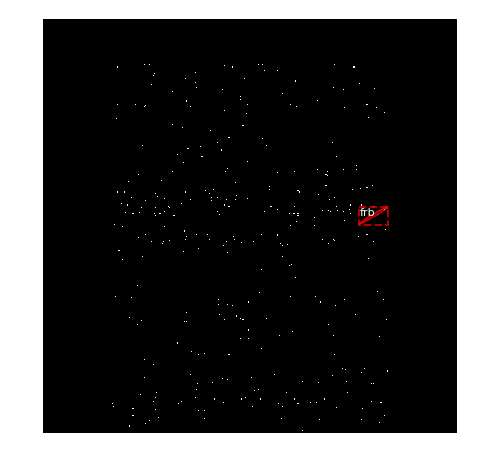

In [17]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, config, 
                           image_id, use_mini_mask=False)
    
log("original_image", original_image)
log("image_meta", image_meta)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

figsize = (8, 8)
# _, ax = plt.subplots(1, figsize=figsize)
visualize.display_instances(original_image, gt_bbox[:,:4], gt_mask, gt_bbox[:,4], 
                            dataset_train.class_names, figsize=figsize)
plt.savefig("gt_test")

In [11]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())

AssertionError: Create model in inference mode.